In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

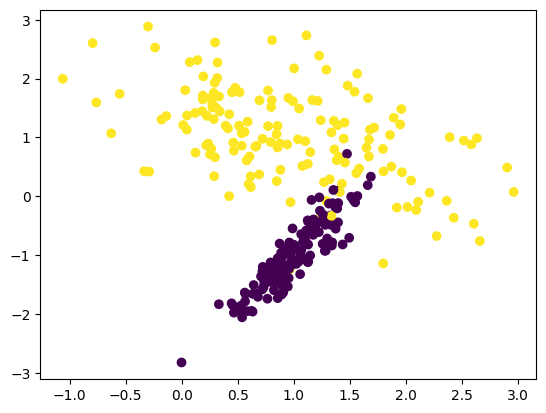

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
gb_clf = GradientBoostingClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=3, 
    random_state=42
)

gb_clf.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [8]:
accuracy = gb_clf.score(X_test, y_test)  #accuracy score
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 93.33%


In [9]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

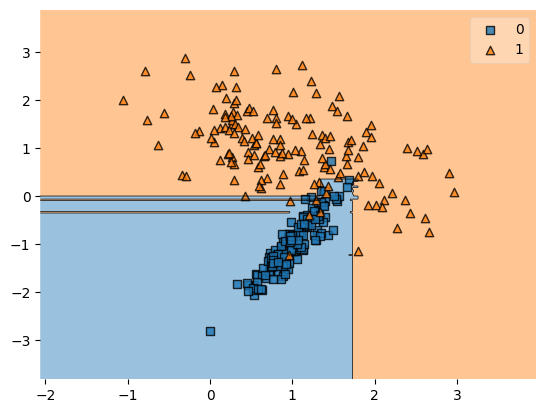

In [10]:
plot_decision_regions(X,y,gb_clf)

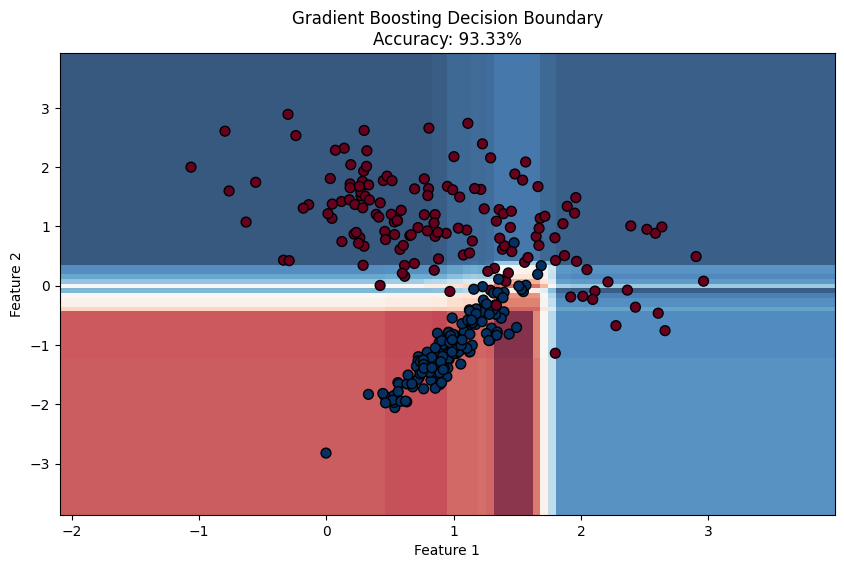

In [12]:
# 

fig, ax = plt.subplots(figsize=(10, 6))

DecisionBoundaryDisplay.from_estimator(
    gb_clf,
    X,
    cmap=plt.cm.RdBu,
    alpha=0.8,
    ax=ax,
    response_method="decision_function",
    plot_method="pcolormesh",
    shading="auto"
)

# Plot the actual training data points on top
scatter = ax.scatter(
    X[:, 0], 
    X[:, 1], 
    c=y, 
    edgecolors="k", 
    cmap=plt.cm.RdBu_r,
    s=50
)

ax.set_title(f"Gradient Boosting Decision Boundary\nAccuracy: {accuracy*100:.2f}%")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
plt.show()